In [40]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [41]:
# Load the dataset from the csv file using pandas
# best way is to mount the drive on colab and
# copy the path for the csv file
data = pd.read_csv("/content/creditcard.csv")


In [42]:
# Grab a peek at the data
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [43]:

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [68]:
#data.dropna(axis=0,how='any',inplace=True)

In [69]:

data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [46]:
# Print the shape of the data
# data = data.sample(frac = 0.1, random_state = 48)
print(data.shape)
print(data.describe())


(170463, 31)
                Time             V1             V2             V3  \
count  170463.000000  170463.000000  170463.000000  170463.000000   
mean    60945.692185      -0.171418       0.041438       0.496009   
std     27706.565970       1.850499       1.611466       1.382129   
min         0.000000     -56.407510     -72.715728     -33.680984   
25%     41172.500000      -0.987177      -0.538322      -0.061200   
50%     60665.000000      -0.185295       0.110233       0.625232   
75%     78493.000000       1.183845       0.804500       1.298406   
max    120194.000000       2.439207      22.057729       9.382558   

                  V4             V5             V6             V7  \
count  170463.000000  170463.000000  170463.000000  170463.000000   
mean        0.118163      -0.177346       0.058682      -0.081195   
std         1.371813       1.338482       1.295161       1.208874   
min        -5.519697     -42.147898     -26.160506     -43.557242   
25%        -0.742708

In [47]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))


0.002116377232484039
Fraud Cases: 360
Valid Transactions: 170102


In [48]:
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()


Amount details of the fraudulent transaction


count     360.000000
mean      111.576722
std       227.309252
min         0.000000
25%         1.000000
50%        11.385000
75%       104.007500
max      1809.680000
Name: Amount, dtype: float64

In [49]:
print("details of valid transaction")
valid.Amount.describe()


details of valid transaction


count    170102.000000
mean         87.272509
std         246.067820
min           0.000000
25%           5.490000
50%          21.890000
75%          76.500000
max       19656.530000
Name: Amount, dtype: float64

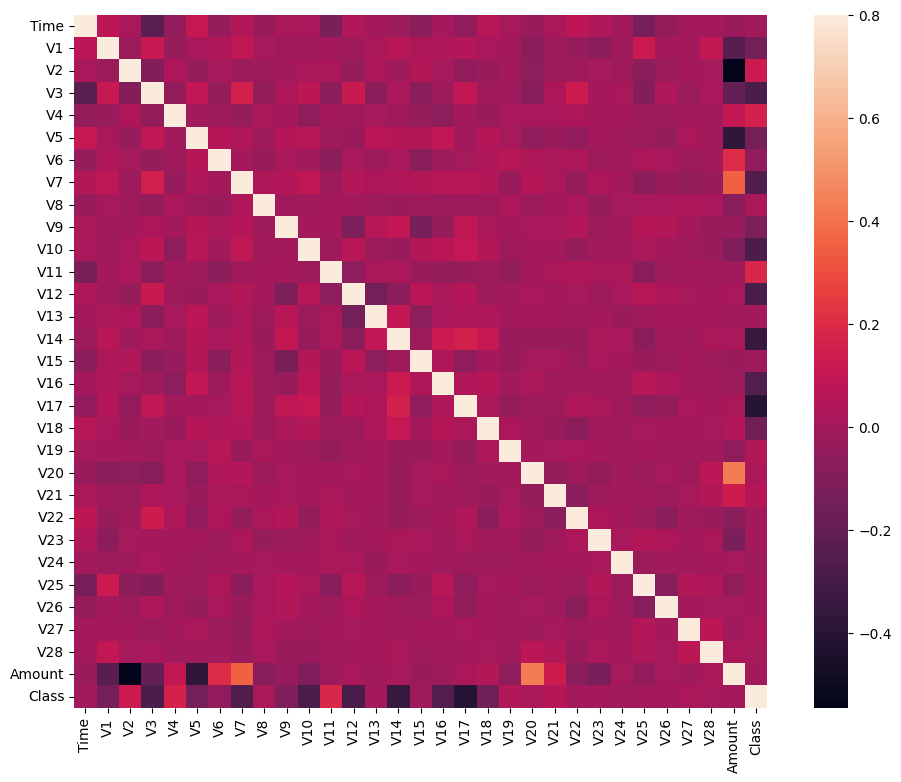

In [50]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()


In [62]:
# dividing the X and the Y from the dataset
X = data.drop(['Class'], axis = 1)
Y = data["Class"].fillna(1)
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing
# (its a numpy array with no columns)
xData = X.values
yData = Y.values


(170463, 30)
(170463,)


In [63]:
# Using Scikit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
		xData, yData, test_size = 0.2, random_state = 42)


In [64]:

# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

"""
keynote: at first I havent removed the null values so i got below erro,
ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively.
 For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier
 and Regressor which accept missing values encoded as NaNs natively.
 Alternatively, it is possible to preprocess the data, for instance by using an imputer
  transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html
  You can find a list of all estimators that handle NaN values at the following
  page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values
"""



ValueError: ignored

In [65]:

# Building the Random Forest Classifier (RANDOM FOREST)
from sklearn.ensemble import HistGradientBoostingClassifier
# random forest model creation

rfc = HistGradientBoostingClassifier()

rfc.fit(xTrain, yTrain)
# predictions
yPred = rfc.predict(xTest)

In [66]:
# Evaluating the classifier
# printing every score of the classifier
# scoring in anything
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()
print("The model used is Random Forest classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F1-Score is {}".format(f1))

MCC = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is{}".format(MCC))


The model used is Random Forest classifier
The accuracy is 0.9970961781010764
The precision is 0.2619047619047619
The recall is 0.13924050632911392
The F1-Score is 0.1818181818181818
The Matthews correlation coefficient is0.18961226373447604


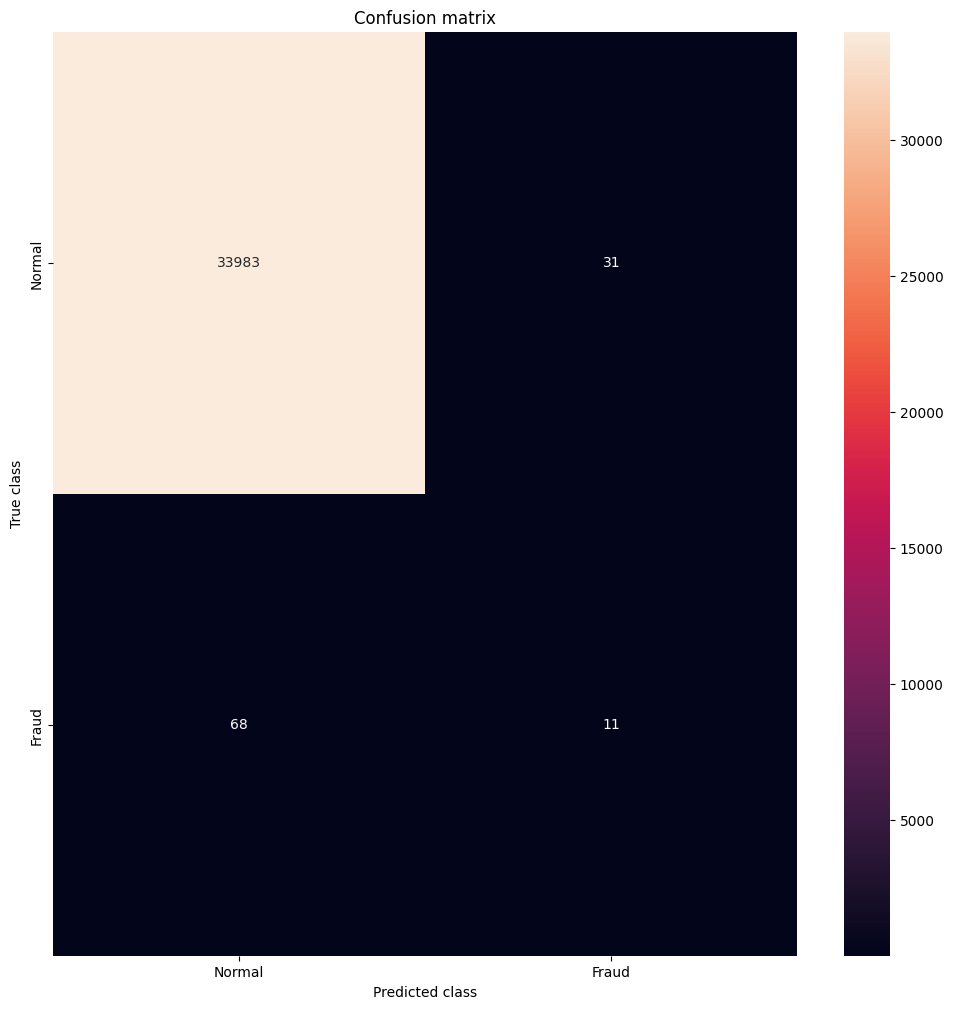

In [67]:
# printing the confusion matrix
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
			yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
